In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import plotly.express as px
import plotly.graph_objects as go
from scipy.io.wavfile import read
import os
import torchaudio

In [28]:
root_folder = "/calc/baronig/Projects/sim_results/adlif_rebuttal/compression_task/16k_compress_examples"
source_folder = os.path.join(root_folder, "sources_files")
source_waveforms = []
for file in sorted(os.listdir(source_folder)):
    if file.endswith(".wav"):
        source_waveform = torchaudio.load(os.path.join(source_folder, file))
        source_waveforms.append(np.array(source_waveform[0]).squeeze())

ef_waveforms = []
ef_folder = os.path.join(root_folder, "ef_adlif_pred")
for file in sorted(os.listdir(ef_folder)):
    ef_waveforms.append(np.load(os.path.join(ef_folder, file)))

se_waveforms = []
se_folder = os.path.join(root_folder, "se_adlif_pred")
for file in sorted(os.listdir(se_folder)):
    se_waveforms.append(np.load(os.path.join(se_folder, file)))

print(len(source_waveforms))
print(len(ef_waveforms))
print(len(se_waveforms))


4
4
4


0
1


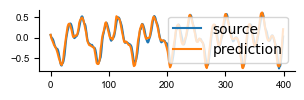

In [33]:
def plot_comparisons(source_waveform, ef_waveform, se_waveform):
    for i, prediction_waveform in enumerate([ef_waveform, se_waveform]):
        # print(i)
        # fig = px.line(y=source_waveform, title="Source waveform")
        # fig.add_trace(go.Scatter(y=prediction_waveform.squeeze(), mode='lines', name='Prediction waveform'))
        # fig.update_layout(title="EF" if i == 0 else "SE")
        # fig.show()
        # fig.write_image("waveform.pdf")
        fr = 72800
        to = 73200
        plt.close()
        # plot with matplotlib
        plt.figure(figsize=(3.3, 0.8))
        # plt.plot(source_waveform[0][fr:to])
        plt.plot(source_waveform.squeeze()[fr:to]) #, color=get_sequential_colors()[0])
        # plt.plot(prediction_waveform[0][fr:to])
        plt.plot(prediction_waveform.squeeze()[fr:to])
        # remove top and right spines
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        # add legend
        plt.legend(['source', 'prediction'])
        # set transparent background
        plt.gca().patch.set_alpha(0)
        # set tick size
        plt.xticks(fontsize=7)
        plt.yticks(fontsize=7)
        # set tick font to arial
        plt.xticks(fontname='Arial')
        plt.yticks(fontname='Arial')

        # plt.show()
        # set fig size
        # plt.show()
        plt.savefig(f"waveform_comparison{i}.svg")


# for waveform_id in range(len(source_waveforms)):
# for waveform_id in range(1):
for waveform_id in [3]:
    source_waveform = source_waveforms[waveform_id]
    ef_waveform = ef_waveforms[waveform_id]
    se_waveform = se_waveforms[waveform_id]
    plot_comparisons(source_waveform, ef_waveform, se_waveform)